## Documentation 
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api "Pandas Documentation")</br>
[Scikit-Learn Documentation](https://scikit-learn.org/stable/supervised_learning.html "Scikit-Learn Documentation")</br>
[NumPy Documentation](https://numpy.org/doc/ "NumPy Documentation")</br>
[Python Tutor](https://pythontutor.com/visualize.html#mode=edit "Python Tutor")</br>

A small caveat About 10 years ago when I was still in school, My professor taught us that EDA should be the first thing to do before doing anything else. He’s got a point back then because the dataset we were seeing and using had no more than 100 features. Today, EDA is still important in understanding your data but often not the first step you want to do. Since mostly you will end up dealing with thousands if not millions of features in your initial dataset and generating visualizations will end up being overwhelming. So I would highly recommend anyone who’s working on large data (features > 100) to do variable selection first before jumping into EDA.

In [1]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")

# df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/UCI_Credit_Card.csv")
# adult_census = pd.read_csv("https://github.com/fenago/MLEssentials2/blob/main/datasets/adult-census.csv?raw=true")

# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


In [2]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())

In [3]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.19.5
0.23.2


In [4]:
%%time
# 2. Structural Investigation of the Data
# a) Basic data queries
df.sample(3)

CPU times: user 2.63 ms, sys: 116 µs, total: 2.75 ms
Wall time: 2.59 ms


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
722,democratic_republic_of_the_congo,2014,developing,59.3,266.0,237,0.01,0.000000,8.0,33711,21.1,312,79.0,4.33,8.0,1.1,NaN,NaN,9.7,9.5,NaN,NaN
1027,greece,2014,developing,88.0,73.0,0,7.53,2163.043414,96.0,1,66.0,0,99.0,8.80,99.0,0.1,21673.78170,1892413.0,0.8,0.7,0.862,17.2
637,costa_rica,2003,developing,78.0,1.0,1,4.04,1070.268999,86.0,1,48.3,1,88.0,8.45,88.0,0.1,4167.71417,4125971.0,2.2,2.1,0.715,12.1


In [5]:
# Show size of the dataset
print("Columns and Rows: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Columns and Rows: 
 (2938, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   

In [6]:
# IMPORTANT:  Change data types to the correct data types
# EXAMPLE of one but you may have to repeat this process
# Change data type of 'sex_of_Driver'
df['measles_'] = df['measles_'].astype('int64')
# df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
# df["weightlbs"]=pd.to_numeric(df["weightlbs"], errors='coerce')

In [7]:
# Treat obviously incorrect values in your dataset

# If you have values in your columns that you want to replace - use this for loop
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced

# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [8]:
# If you want to remove a value from a column - use this: 
# df = df[df.status != 'unk']   # This removes the value 'unk' from your data in the column.  Modify as needed

In [9]:
# If you need to search through a column and find a value in a string:
# df[df['State'].str.contains('il', na=False)]
# df['State'].unique()

# another technique to search and replace strings:
# df.loc[df['StockCodeDescription'].str.contains('MISEL', na=False),]
# df['StockCodeDescription'] = df['StockCodeDescription'].str.replace('MISELTOE', 'MISTLETOE')

# Here is another technique to search and replace in a string:
# Create a mask
# il_mask = df['State'].isin(['il', 'Il', 'iL', 'Il']) # This is saying il, Il, iL, Il are all in the STATE column
# il_mask.sum()
# df.loc[il_mask, 'State'] = 'IL'   # subset the mask and replace all instances with IL

In [10]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    16
int64       4
object      2
dtype: int64

In [11]:
# How many unique values per feature
df.nunique().to_frame().T

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,193,16,2,362,425,209,1076,2328,87,958,608,252,73,818,81,200,2490,2278,200,207,625,173


In [12]:
df.dtypes.to_frame()

,0
country,object
year,int64
status,object
life_expectancy_,float64
adult_mortality,float64
infant_deaths,int64
alcohol,float64
percentage_expenditure,float64
hepatitis_b,float64
measles_,int64


In [13]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()


,country,status
0,afghanistan,developing
1,afghanistan,developing
2,afghanistan,developing
3,afghanistan,developing
4,afghanistan,developing


,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)


(2938, 22)


In [15]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,country,status
0,afghanistan,developing
1,afghanistan,developing
2,afghanistan,developing
3,afghanistan,developing
4,afghanistan,developing


In [16]:
# 3. Qualitative Investigation of the Data
# a) Duplicates
# Duplicates in the Columns?
df.duplicated()
df.duplicated().sum()

# Duplicated Rows?
df[df.duplicated()]
# Find duplicates in specific columns from your dataset.  Replace with your columns obviously.  keep the first or last dupe.
# df.loc[df.duplicated(keep='last'), ['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID']]

# Only consider duplicates in these columns and drop only them
# df.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate','CustomerID'], keep='first').sum()
# By looking only at these four columns instead of all of them, we can see that the number of duplicate rows may increase/decrease
# This means that there are rows that have the exact same values as these four columns but have different values in 
# other columns, which means they may be different records. 
# In most cases, it is better to use all the columns to identify duplicate records.

# df_unique = df.drop_duplicates(keep='first')
# df.drop_duplicates(keep='first')

# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['status'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=['status'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

0

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling


You seem to have 0 duplicates in your database.


(2938, 22)

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

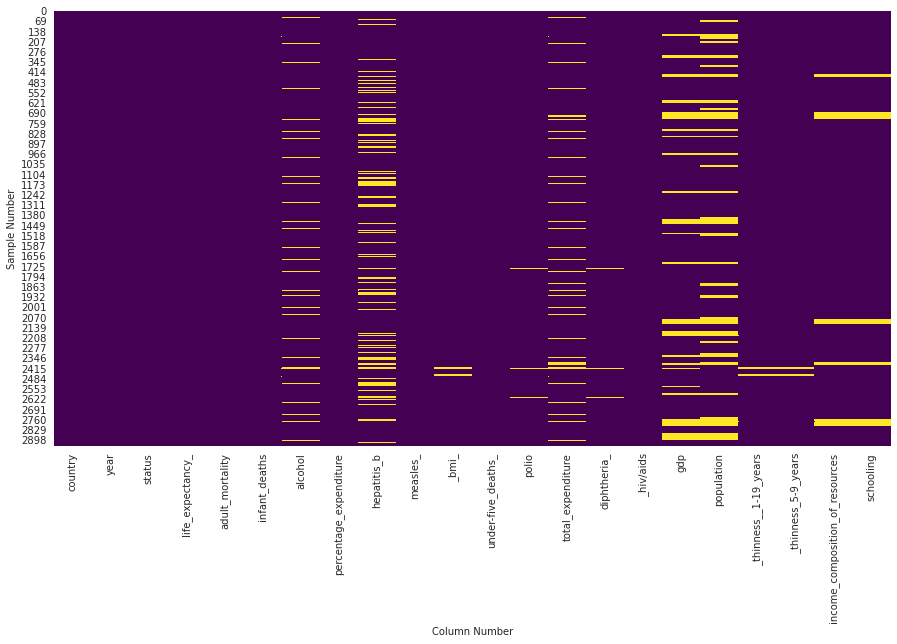

In [17]:
# MISSING VALUES
df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')




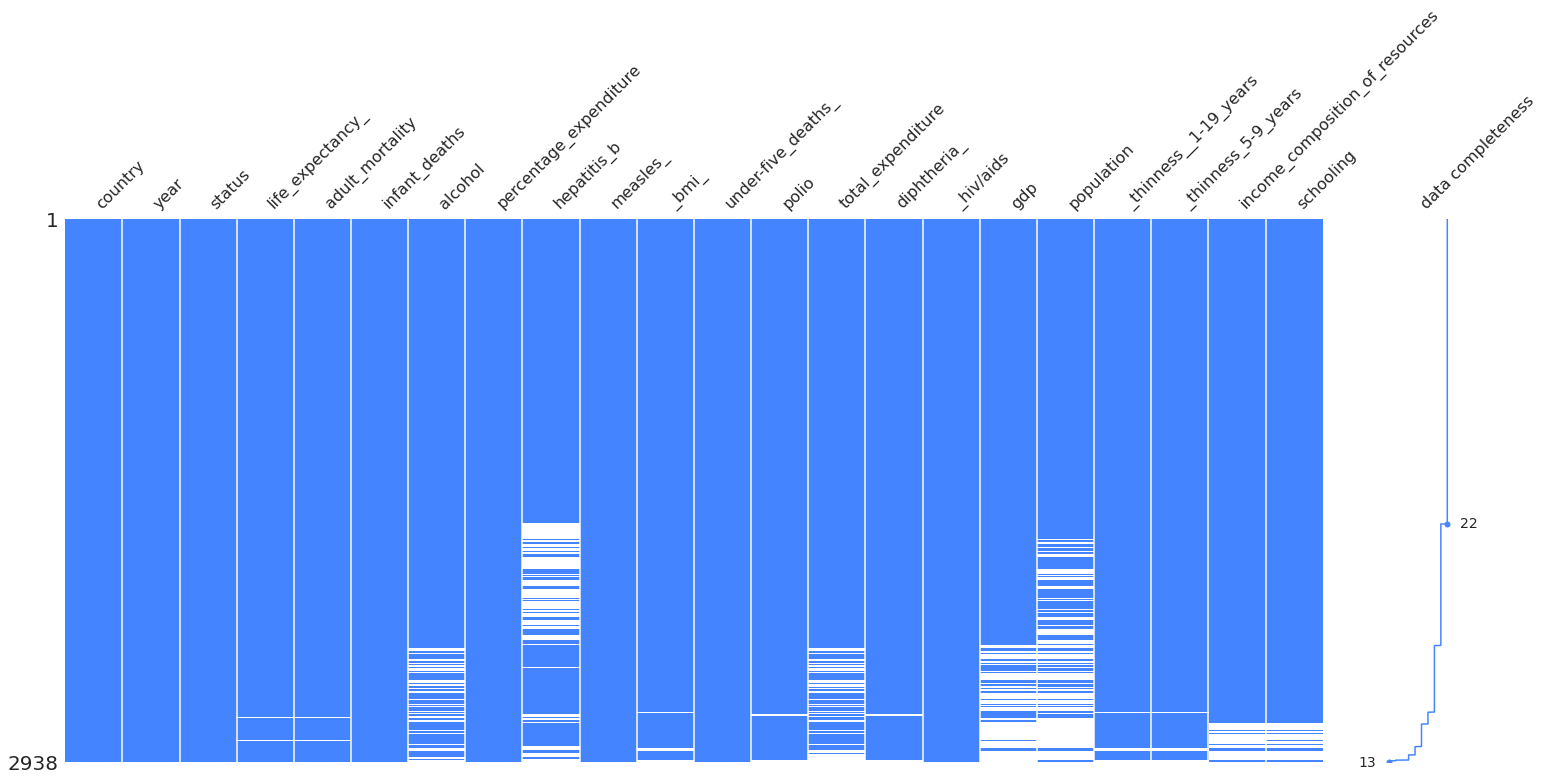

In [18]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));


In [19]:
# Drop rows that are 20% or more empty (you set the threshold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(2852, 22)

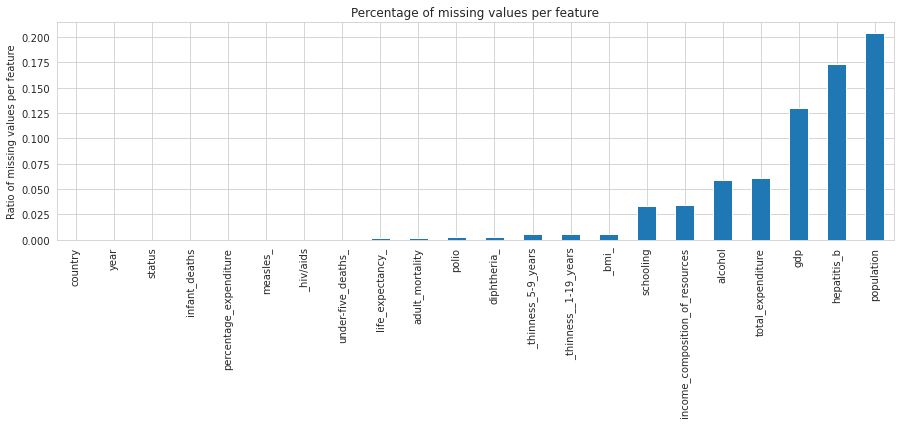

In [20]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [21]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(2852, 20)

In [22]:
# d) Impute Values (Small Holes)
# df['CustomerID'].fillna('Missing', inplace=True)

# Replace NaN one column with the median
# df['col1'] = df['col1'].fillna(df['col1'].median())
# df = df.fillna(df.median())

# to see categorical encoding - see:  https://github.com/fenago/eda/blob/main/Cars_XGBoost.ipynb

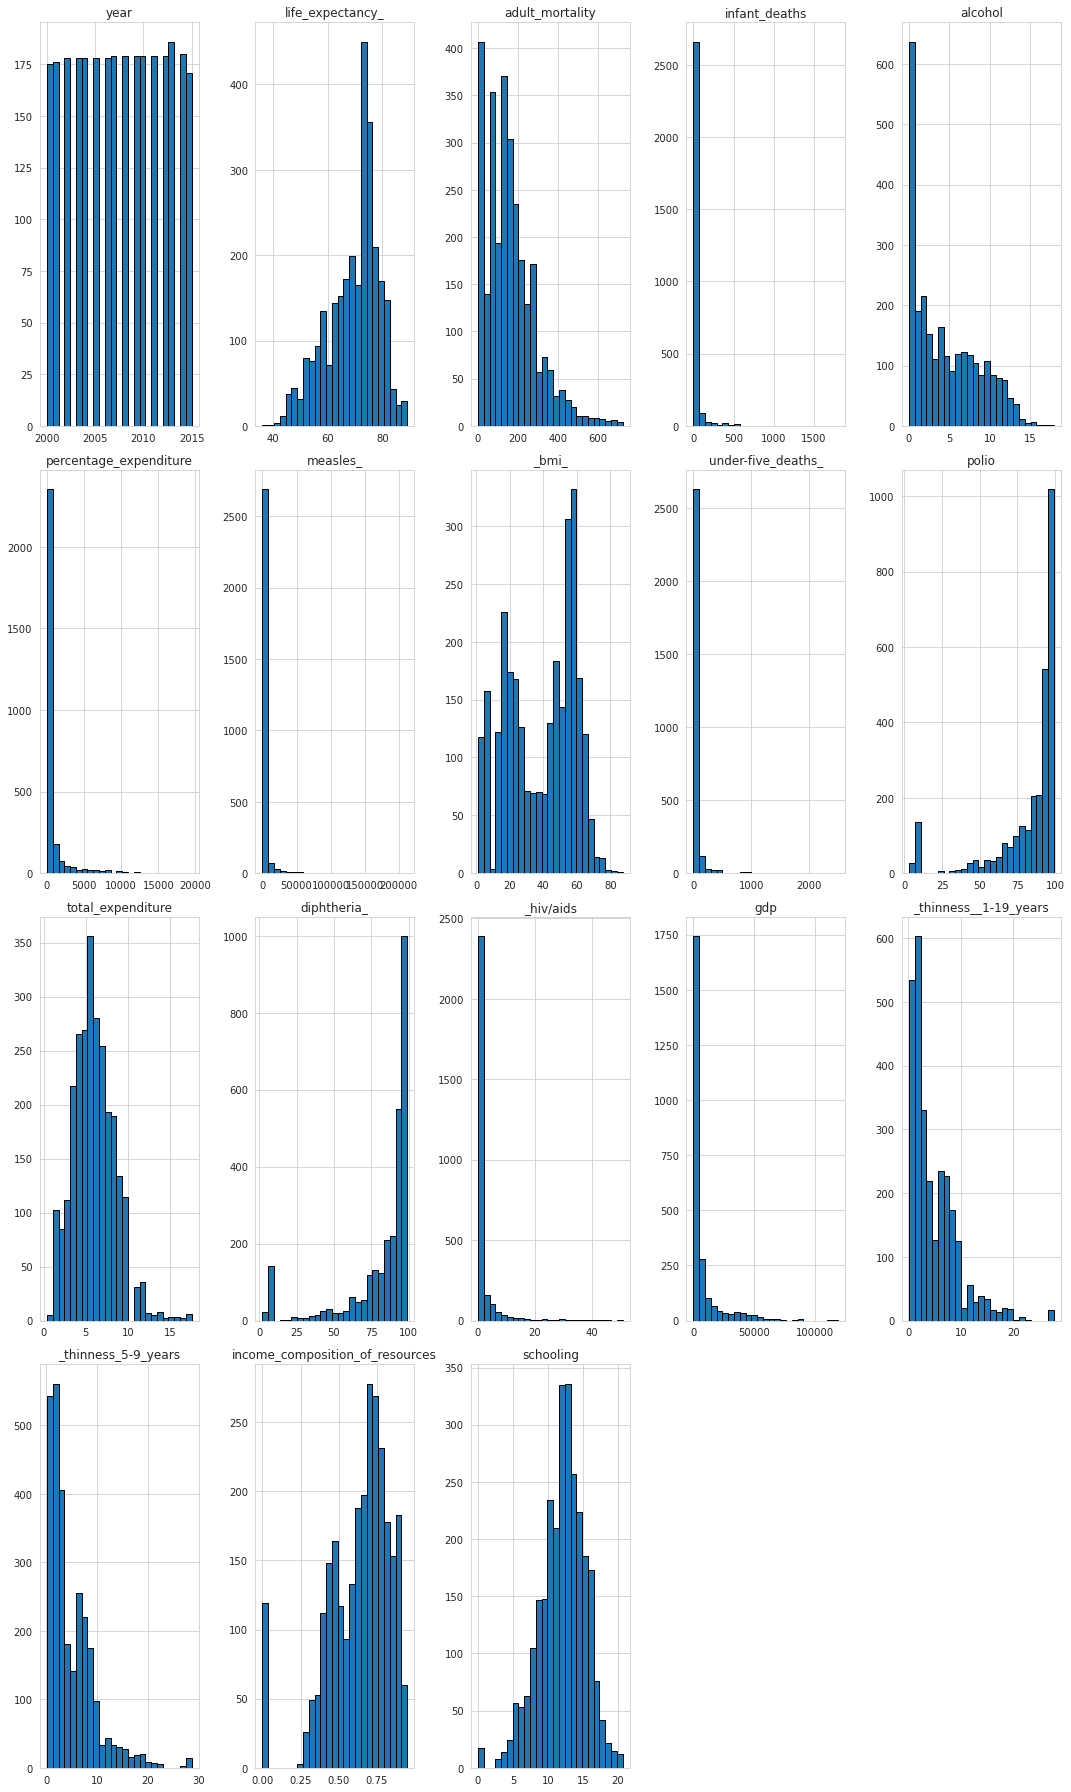

In [23]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [24]:
# May require the dataframe to be manipulated (skip for now)

# Collects for each feature the most frequent entry
# most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
# df_freq = df.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
# df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
# display(df_freq.head())

# Visualize the 'df_freq' table
# df_freq.plot.bar(figsize=(15, 4));

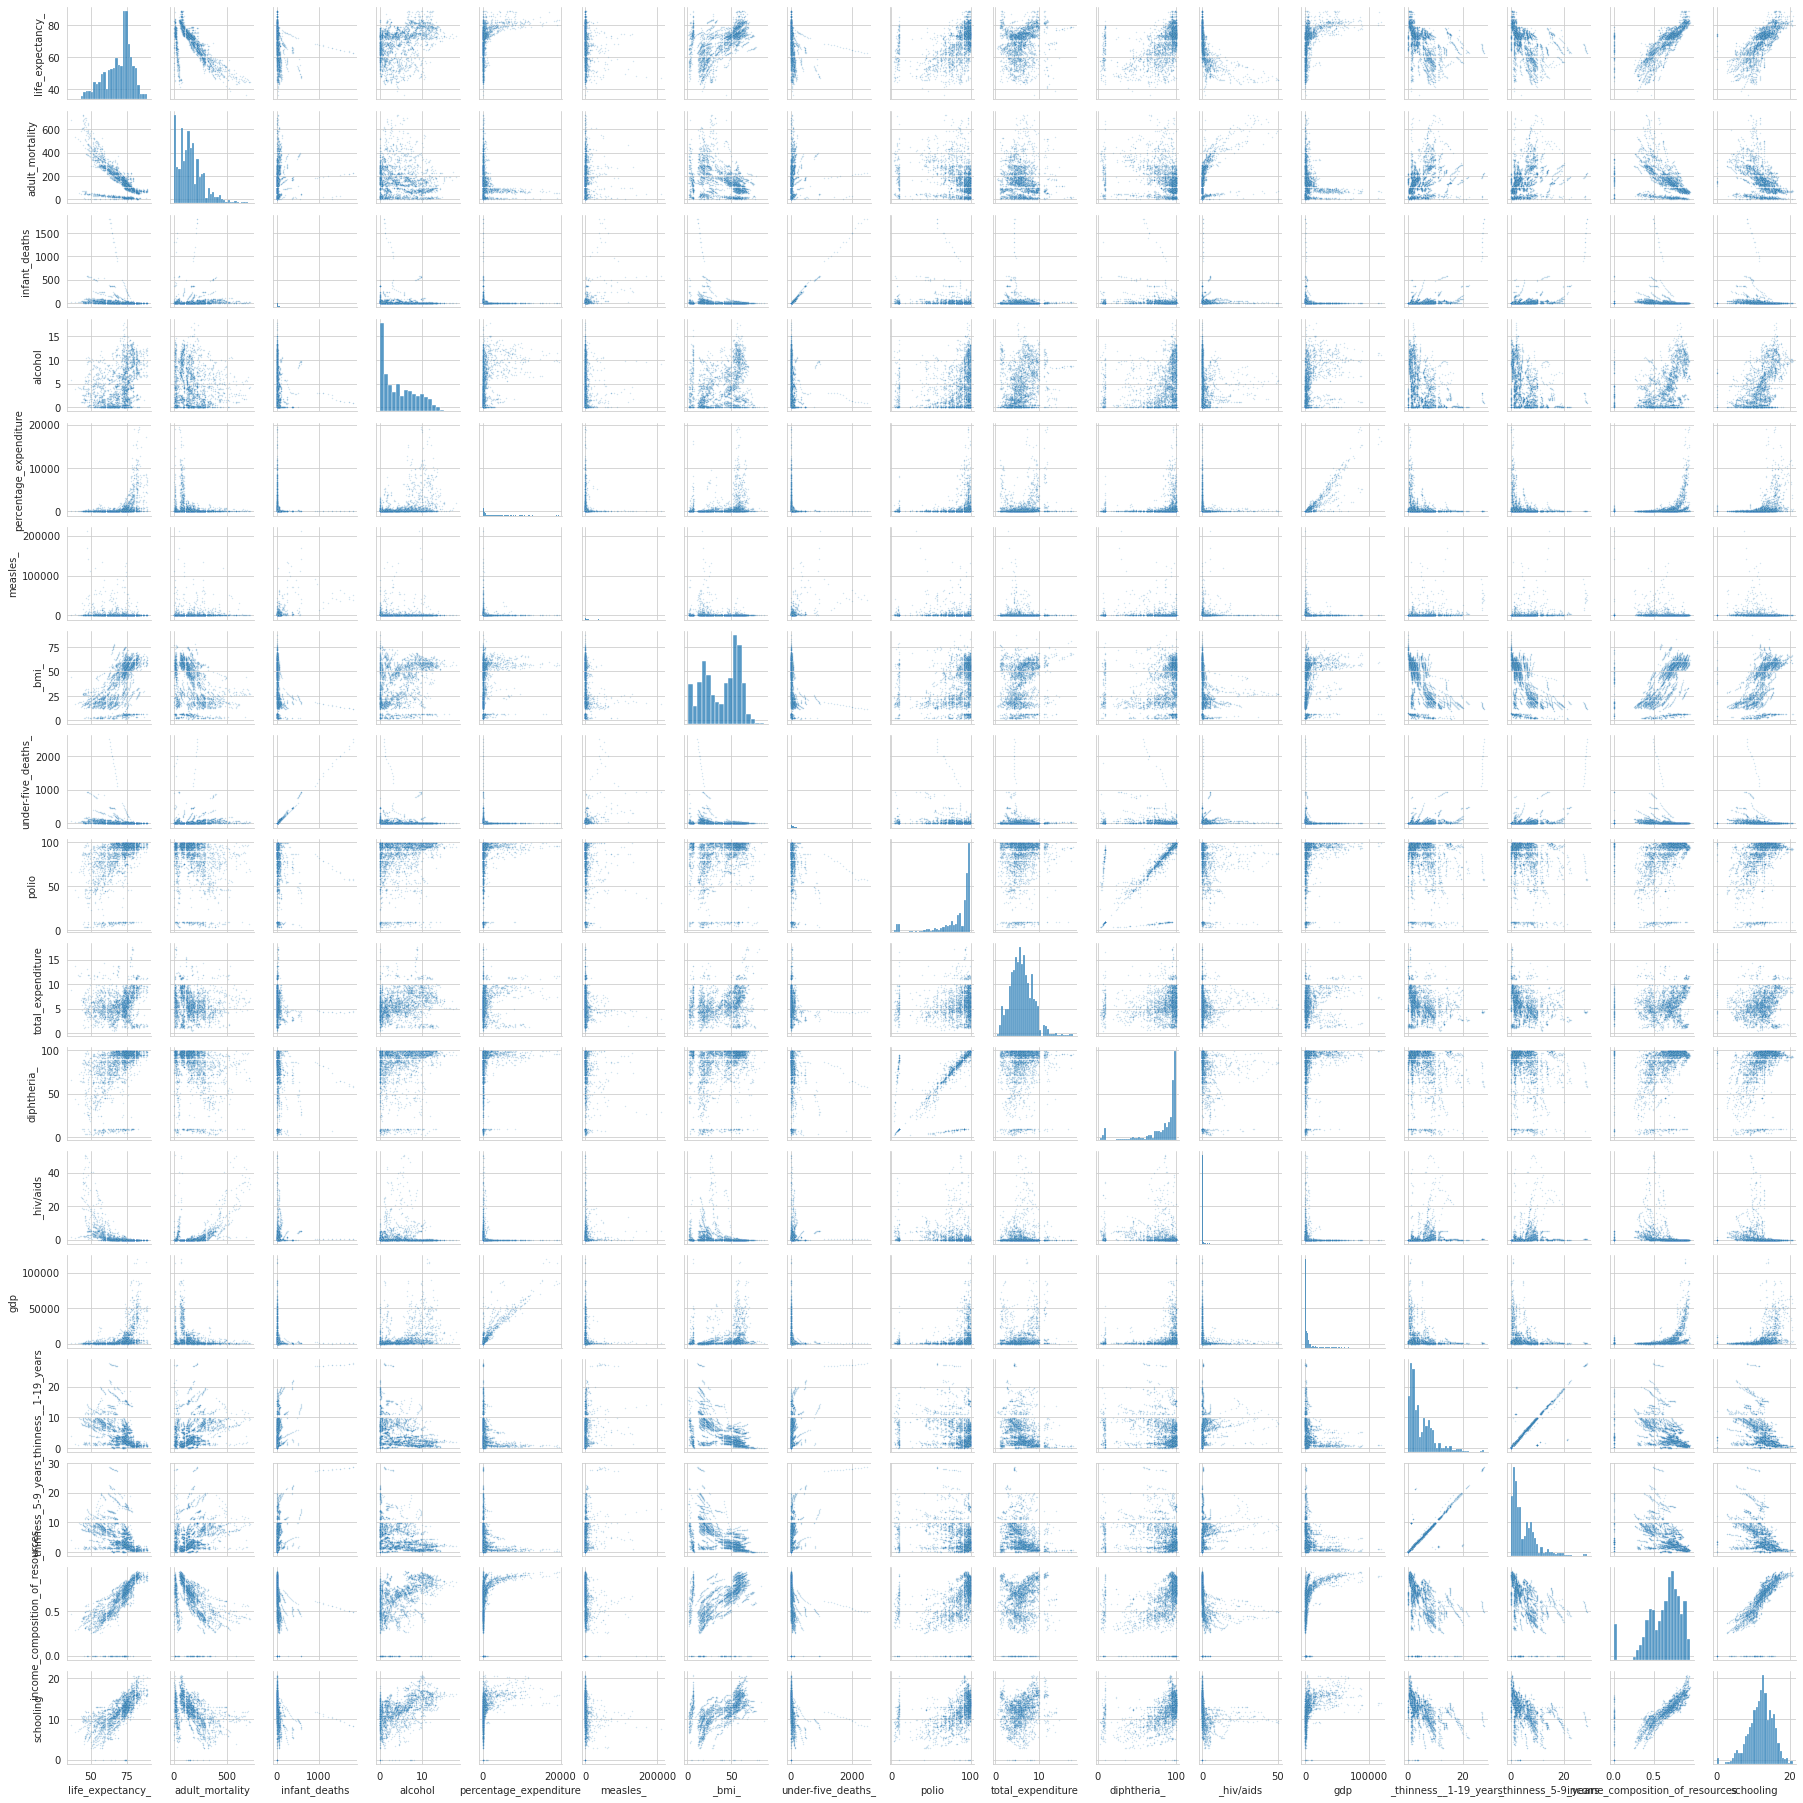

In [25]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


In [26]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(2852, 1)

In [27]:
# Update the Target Feature

# Establish number of columns and rows needed to plot all features
# n_cols = 5
# n_elements = len(df_discrete.columns)
# n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
# y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
# fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
# for col, ax in zip(df_discrete.columns, axes.ravel()):
#     sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
# plt.tight_layout();

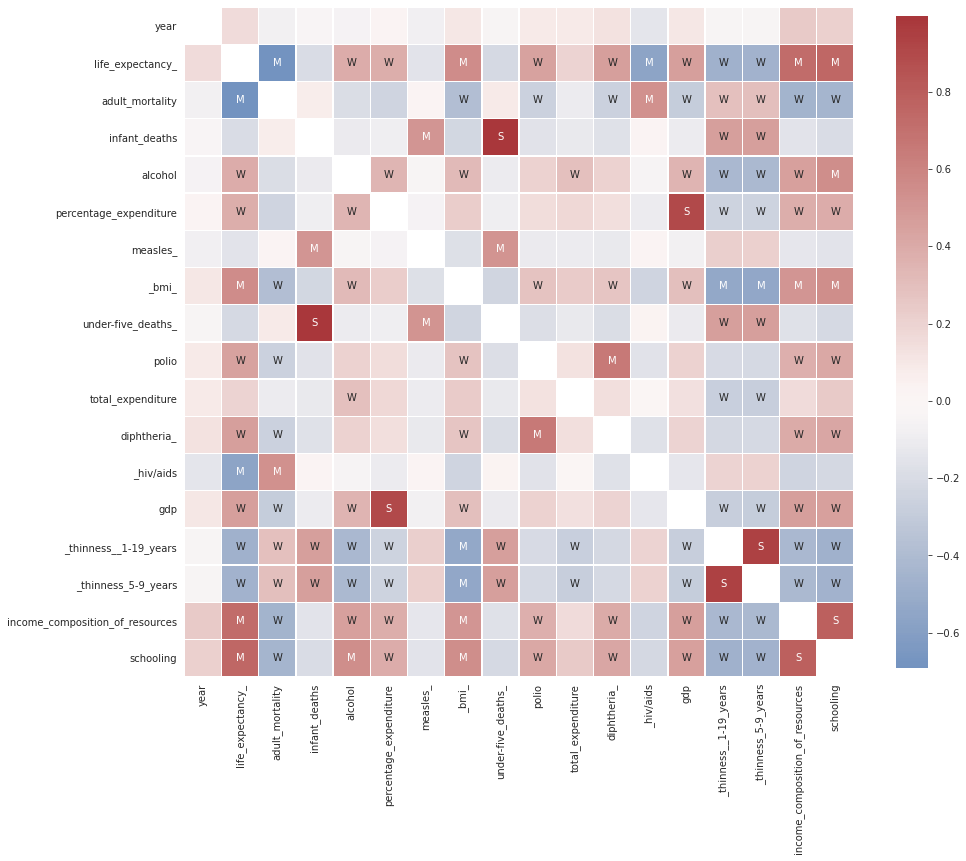

In [28]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [29]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

adult_mortality        life_expectancy_                  -0.691425
_hiv/aids              life_expectancy_                  -0.564484
_thinness_5-9_years    _bmi_                             -0.534742
_thinness__1-19_years  _bmi_                             -0.527444
schooling              _thinness__1-19_years             -0.471652
                                                            ...   
                       life_expectancy_                   0.749888
                       income_composition_of_resources    0.792051
gdp                    percentage_expenditure             0.899307
_thinness_5-9_years    _thinness__1-19_years              0.938194
under-five_deaths_     infant_deaths                      0.996636
Length: 153, dtype: float64

In [30]:
# 5. Outliers
# a) IQR
# b) Box Plots
# c) Treat all outliers



In [31]:
# 6. Exploratory Data Analysis
# a) Univariate Analysis
# b) Bivariate Analysis
# c) Multivariate Analysis



<AxesSubplot:>

Text(0.5, 1.0, 'Multi-Collinearity of Features')

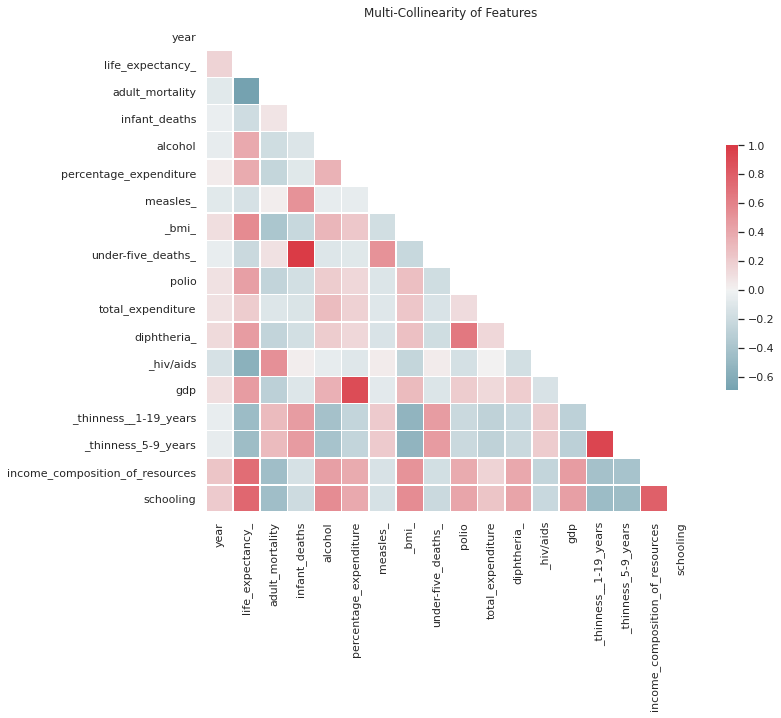

In [32]:
# 7. Feature Selection
# a) Decide which features to keep (Data)
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

# b) Decide which features to keep (Model)
# c) Treat your dataset



In [33]:
# 8. Feature Importance
# a) Decide which features are the most important to your Model
# b) Treat your dataset

# https://github.com/fenago/MLEssentials2/blob/main/FeatureImportance.ipynb

In [34]:
df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy_                   float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
measles_                             int64
_bmi_                              float64
under-five_deaths_                   int64
polio                              float64
total_expenditure                  float64
diphtheria_                        float64
_hiv/aids                          float64
gdp                                float64
_thinness__1-19_years              float64
_thinness_5-9_years                float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [35]:
# 9. Encode Data (Categorial)
# a) OHE
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
# catDF.head()
# numDF.head()

# catDF = pd.get_dummies(catDF[['country','other_cols']])  # don't include your target if it is cat
catDF = pd.get_dummies(catDF[['country']])
                       
catDF.head()


,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [36]:
# b) Label Encoding

from sklearn.preprocessing import LabelEncoder

# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
catDF['status']= label_encoder.fit_transform(df['status'])
catDF.head(10)

,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe,status
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy_                   float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
measles_                             int64
_bmi_                              float64
under-five_deaths_                   int64
polio                              float64
total_expenditure                  float64
diphtheria_                        float64
_hiv/aids                          float64
gdp                                float64
_thinness__1-19_years              float64
_thinness_5-9_years                float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [38]:
# 10. Standardize / Normalize Data (Numeric)
# a) Normalize your features
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

# Converting each of the columns to scaled version
numDF['alcohol_scaled'] = rob_scaler.fit_transform\
                        (numDF['alcohol'].values.reshape(-1,1))
numDF['gdp_scaled'] = rob_scaler.fit_transform\
                        (numDF['gdp']\
                         .values.reshape(-1,1))
numDF['schooling_scaled'] = rob_scaler.fit_transform\
                        (numDF['schooling']\
                         .values.reshape(-1,1))
# Dropping the original columns
numDF.drop(['alcohol','gdp','schooling'], axis=1, inplace=True)
numDF.sample(3)
# b) Standardize your features



<ipython-input-38-c23393f4cc05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDF['alcohol_scaled'] = rob_scaler.fit_transform\


,year,life_expectancy_,adult_mortality,infant_deaths,percentage_expenditure,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,alcohol_scaled,gdp_scaled,schooling_scaled
1434,2009,74.7,95.0,1,8.140374,22,63.0,1,75.0,7.42,81.0,0.1,4.7,4.7,0.746,-0.319618,-0.308923,0.190476
1602,2001,55.0,34.0,60,4.395886,4464,16.1,110,56.0,6.39,49.0,2.4,1.8,1.7,0.297,-0.482733,-0.317576,-1.857143
2433,2005,46.0,63.0,3,372.165147,0,27.8,4,88.0,6.80,86.0,49.1,7.3,7.5,0.495,0.188832,0.200113,-0.642857


In [40]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(2852, 205)


In [41]:
X.sample()

,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe,status,year,life_expectancy_,adult_mortality,infant_deaths,percentage_expenditure,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,alcohol_scaled,gdp_scaled,schooling_scaled
360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [44]:
# 11. Evaluate Algorithms
# a) Split-out validation dataset
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(X, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)
type(df_train_full)

(2281, 571)

(2281, 571)

pandas.core.frame.DataFrame

In [45]:
df_train_full.head()

,country_afghanistan,country_albania,country_algeria,country_angola,country_antigua_and_barbuda,country_argentina,country_armenia,country_australia,country_austria,country_azerbaijan,country_bahamas,country_bahrain,country_bangladesh,country_barbados,country_belarus,country_belgium,country_belize,country_benin,country_bhutan,country_bolivia_(plurinational_state_of),country_bosnia_and_herzegovina,country_botswana,country_brazil,country_brunei_darussalam,country_bulgaria,country_burkina_faso,country_burundi,country_cabo_verde,country_cambodia,country_cameroon,country_canada,country_central_african_republic,country_chad,country_chile,country_china,country_colombia,country_comoros,country_congo,country_costa_rica,country_croatia,country_cuba,country_cyprus,country_czechia,country_côte_d'ivoire,country_democratic_republic_of_the_congo,country_denmark,country_djibouti,country_dominica,country_dominican_republic,country_ecuador,country_egypt,country_el_salvador,country_equatorial_guinea,country_eritrea,country_estonia,country_ethiopia,country_fiji,country_finland,country_france,country_gabon,country_gambia,country_georgia,country_germany,country_ghana,country_greece,country_grenada,country_guatemala,country_guinea,country_guinea-bissau,country_guyana,country_haiti,country_honduras,country_hungary,country_iceland,country_india,country_indonesia,country_iran_(islamic_republic_of),country_iraq,country_ireland,country_israel,country_italy,country_jamaica,country_japan,country_jordan,country_kazakhstan,country_kenya,country_kiribati,country_kuwait,country_kyrgyzstan,country_lao_people's_democratic_republic,country_latvia,country_lebanon,country_lesotho,country_liberia,country_libya,country_lithuania,country_luxembourg,country_madagascar,country_malawi,country_malaysia,country_maldives,country_mali,country_malta,country_marshall_islands,country_mauritania,country_mauritius,country_mexico,country_micronesia_(federated_states_of),country_mongolia,country_montenegro,country_morocco,country_mozambique,country_myanmar,country_namibia,country_nauru,country_nepal,country_netherlands,country_new_zealand,country_nicaragua,country_niger,country_nigeria,country_norway,country_oman,country_pakistan,country_palau,country_panama,country_papua_new_guinea,country_paraguay,country_peru,country_philippines,country_poland,country_portugal,country_qatar,country_republic_of_korea,country_republic_of_moldova,country_romania,country_russian_federation,country_rwanda,country_saint_kitts_and_nevis,country_saint_lucia,country_saint_vincent_and_the_grenadines,country_samoa,country_sao_tome_and_principe,country_saudi_arabia,country_senegal,country_serbia,country_seychelles,country_sierra_leone,country_singapore,country_slovakia,country_slovenia,country_solomon_islands,country_somalia,country_south_africa,country_spain,country_sri_lanka,country_sudan,country_suriname,country_swaziland,country_sweden,country_switzerland,country_syrian_arab_republic,country_tajikistan,country_thailand,country_the_former_yugoslav_republic_of_macedonia,country_timor-leste,country_togo,country_tonga,country_trinidad_and_tobago,country_tunisia,country_turkey,country_turkmenistan,country_tuvalu,country_uganda,country_ukraine,country_united_arab_emirates,country_united_republic_of_tanzania,country_united_states_of_america,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela_(bolivarian_republic_of),country_viet_nam,country_yemen,country_zambia,country_zimbabwe,status,year,life_expectancy_,adult_mortality,infant_deaths,percentage_expenditure,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,alcohol_scaled,gdp_scaled,schooling_scaled
2052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']

In [47]:
# b) Test options and evaluation metric
# c) Spot Check Algorithms

#Regression Spot Check
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(df_train_full, df_test, y_train, y_test)
print(models)



     |████████████████████████████████| 127.6 MB 36.1 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 248 kB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 38.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 16.1 MB/s eta 0:00:01    |████████████▏                   | 3.8 MB 16.1 MB/s eta 0:00:01     |██████████████████              | 5.7 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 28.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.

In [49]:
# Classification Spot Check
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(df_train_full, df_test, y_train, y_test)



100%|██████████| 29/29 [00:11<00:00,  2.53it/s]


In [50]:
# d) Compare Algorithms
print(models)


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
LinearDiscriminantAnalysis         1.00               1.00     1.00      1.00   
KNeighborsClassifier               1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
CalibratedClassifierCV             1.00               1.00     1.00      1.00   
SVC                         

In [ ]:
# 12. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles



In [ ]:
# 13. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use



In [ ]:
# 14. Deploy the Model
# a) Flask
# b) as a microservice
# c) using serverless (like lambda)
# d) monetizing and securing the service